In [1]:
## This script is to plot mean DA MUCAPE, mean NoDA MUCAPE, and mean RAOB MUCAPE
## from Tucson (TUS) and Flagstaff (FGZ) at 00 UTC and 12 UTC >>>>>>>> STEP 2
## Created by C. Bayu Risanto, S.J. (9 September 2025)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import matlib
import pandas as pd
import xarray as xr
from scipy import stats
from scipy.io import loadmat,savemat 
from scipy.interpolate import griddata
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mplotcolors
import matplotlib.dates as mdates
from matplotlib import cm
from datetime import date, datetime, timedelta
import glob
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units
def date_range_list(start_date, end_date):
    # Return list of datetime.date objects (inclusive) between start_date and end_date (inclusive).
    date_list = []
    curr_date = start_date
    while curr_date <= end_date:
        date_list.append(curr_date)
        curr_date += timedelta(hours=1)
    return date_list
u = 6   # 6 is equal to 00 UTC and 18 is to 12 UTC
ti = '00'  # match the time with UTC in string

In [2]:
## days of rain
DR = ['2021-07-03','2021-07-09','2021-07-10','2021-07-12','2021-07-13','2021-07-14',
      '2021-07-15','2021-07-16','2021-07-18','2021-07-21','2021-07-22','2021-07-23',
      '2021-07-24','2021-07-25','2021-07-29','2021-07-30','2021-08-10','2021-08-11',
      '2021-08-13','2021-08-15','2021-08-16','2021-08-30','2021-08-31','2021-09-01']

In [3]:
## create day times
daystrform = '%Y-%m-%d'
daySta = [datetime.strptime(DR[i],daystrform) for i in range(len(DR))]
dayEnd = [(datetime.strptime(DR[i],daystrform)) + timedelta(days=1) for i in range(len(DR))]

In [4]:
## read data RAOB
SITE1 = 'TUS'
path = '/secchi/bayu/DATA/ARIZONA_PRO/OBS/RAOB//'+SITE1+'/'

MUCAPE00 = []; MUCAPE12 = []
for i in range(len(DR)):
    dt = str(dayEnd[i])[0:10]
    tfile1 = path+SITE1+'_'+dt[0:4]+dt[5:7]+dt[8:10]+'00.dat' # option is 00 UTC and 12 UTC!!!!!!!!!!!
    tfile2 = path+SITE1+'_'+dt[0:4]+dt[5:7]+dt[8:10]+'12.dat'
    col_names = ['pressure','height','temperature','dewpoint','mixr','direction','speed']

#####################################3### 00
    
    df1 = pd.read_fwf(tfile1,
                     skiprows=5, usecols=[0, 1, 2, 3, 5, 6, 7], names=col_names)
        
    # Drop any rows with all NaN values for T, Td, Mx
    df1 = df1.dropna(subset=('temperature', 'dewpoint', 'mixr', 'direction', 'speed'),
                     how='all').reset_index(drop=True)
    
    ## pull the data out
    p1  = df1['pressure'].values * units.hPa
    h1  = df1['height'].values
    t1  = df1['temperature'].values * units.degC
    td1 = df1['dewpoint'].values * units.degC
    mx1 = df1['mixr'].values

    ## calculate MUCAPE
    mucape1, mucin1 = mpcalc.most_unstable_cape_cin(p1, t1, td1, depth=50 * units.hPa)
    
    MUCAPE00.append(mucape1.magnitude)

######################################### 12
    df2 = pd.read_fwf(tfile2,
                     skiprows=5, usecols=[0, 1, 2, 3, 5, 6, 7], names=col_names)
        
    # Drop any rows with all NaN values for T, Td, Mx
    df2 = df2.dropna(subset=('temperature', 'dewpoint', 'mixr', 'direction', 'speed'),
                     how='all').reset_index(drop=True)
    
    ## pull the data out
    p2  = df2['pressure'].values * units.hPa
    h2  = df2['height'].values
    t2  = df2['temperature'].values * units.degC
    td2 = df2['dewpoint'].values * units.degC
    mx2 = df2['mixr'].values

    ## calculate MUCAPE
    mucape2, mucin2 = mpcalc.most_unstable_cape_cin(p2, t2, td2, depth=50 * units.hPa)
    
    MUCAPE12.append(mucape2.magnitude)
    
tus_MUCAPE_00 = np.asarray(MUCAPE00)
tus_MUCAPE_12 = np.asarray(MUCAPE12)


In [5]:
print(tus_MUCAPE_00)

[2684.01260601 1212.7494883  1538.14324337 1840.29003614  934.04794452
  953.52802446 1985.1639467   936.59379307 1433.8120915  1517.32316593
 3440.52449635  273.59142172  751.32182439 1198.50138641  325.96816063
  750.27960726 1078.75007114 1459.33938841 1355.84111394 2118.14544375
 2886.13878893  711.4389521  1145.38204946  731.49009005]


In [6]:
## get mean_MUCAPE
mu_tusMUCAPE00 = np.mean(tus_MUCAPE_00,axis=0)
mu_tusMUCAPE12 = np.mean(tus_MUCAPE_12,axis=0)
print('RAOB mucape TUS 00 '+str(np.round(mu_tusMUCAPE00,1))+' J/kg')
print('RAOB mucape TUS 12 '+str(np.round(mu_tusMUCAPE12,1))+' J/kg')

RAOB mucape TUS 00 1385.9 J/kg
RAOB mucape TUS 12 980.4 J/kg


In [7]:
## read data RAOB
SITE2 = 'FGZ'
path = '/secchi/bayu/DATA/ARIZONA_PRO/OBS/RAOB//'+SITE2+'/'

MUCAPE00 = []; MUCAPE12 = []
for i in range(len(DR)):
    dt = str(dayEnd[i])[0:10]
    tfile1 = path+SITE2+'_'+dt[0:4]+dt[5:7]+dt[8:10]+'00.dat' # option is 00 UTC and 12 UTC!!!!!!!!!!!
    tfile2 = path+SITE2+'_'+dt[0:4]+dt[5:7]+dt[8:10]+'12.dat'
    col_names = ['pressure','height','temperature','dewpoint','mixr','direction','speed']

#####################################3### 00
    
    df1 = pd.read_fwf(tfile1,
                     skiprows=5, usecols=[0, 1, 2, 3, 5, 6, 7], names=col_names)
        
    # Drop any rows with all NaN values for T, Td, Mx
    df1 = df1.dropna(subset=('temperature', 'dewpoint', 'mixr', 'direction', 'speed'),
                     how='all').reset_index(drop=True)
    
    ## pull the data out
    p1  = df1['pressure'].values * units.hPa
    h1  = df1['height'].values
    t1  = df1['temperature'].values * units.degC
    td1 = df1['dewpoint'].values * units.degC
    mx1 = df1['mixr'].values

    ## calculate MUCAPE
    mucape1, mucin1 = mpcalc.most_unstable_cape_cin(p1, t1, td1, depth=50 * units.hPa)
    
    MUCAPE00.append(mucape1.magnitude)

######################################### 12
    df2 = pd.read_fwf(tfile2,
                     skiprows=5, usecols=[0, 1, 2, 3, 5, 6, 7], names=col_names)
        
    # Drop any rows with all NaN values for T, Td, Mx
    df2 = df2.dropna(subset=('temperature', 'dewpoint', 'mixr', 'direction', 'speed'),
                     how='all').reset_index(drop=True)
    
    ## pull the data out
    p2  = df2['pressure'].values * units.hPa
    h2  = df2['height'].values
    t2  = df2['temperature'].values * units.degC
    td2 = df2['dewpoint'].values * units.degC
    mx2 = df2['mixr'].values

    ## calculate MUCAPE
    mucape2, mucin2 = mpcalc.most_unstable_cape_cin(p2, t2, td2, depth=50 * units.hPa)
    
    MUCAPE12.append(mucape2.magnitude)
    
fgz_MUCAPE_00 = np.asarray(MUCAPE00)
fgz_MUCAPE_12 = np.asarray(MUCAPE12)


In [8]:
## get mean_MUCAPE
mu_fgzMUCAPE00 = np.mean(fgz_MUCAPE_00,axis=0)
mu_fgzMUCAPE12 = np.mean(fgz_MUCAPE_12,axis=0)
print('RAOB mucape FGZ 00 '+str(np.round(mu_fgzMUCAPE00,1))+' J/kg')
print('RAOB mucape FGZ 12 '+str(np.round(mu_fgzMUCAPE12,1))+' J/kg')

RAOB mucape FGZ 00 808.7 J/kg
RAOB mucape FGZ 12 430.3 J/kg


In [9]:
### read DA and NoDA MUCAPE
linkw = '/secchi/bayu/DATA/ARIZONA_PRO/WRF_EXTR/WRF-RAOB/MUCAPE_extr/'
tus_w = loadmat(linkw + 'TUS_mean_MUCAPE_DANoDA.mat')
tus_DA = np.squeeze(tus_w['DA']); tus_NO = np.squeeze(tus_w['NoDA'])
fgz_w = loadmat(linkw + 'FGZ_mean_MUCAPE_DANoDA.mat')
fgz_DA = np.squeeze(fgz_w['DA']); fgz_NO = np.squeeze(fgz_w['NoDA'])

In [10]:
## create time
st_time = datetime.fromisoformat('2021-08-15_18')
en_time = datetime.fromisoformat('2021-08-16_12')
tt1 = date_range_list(st_time,en_time)

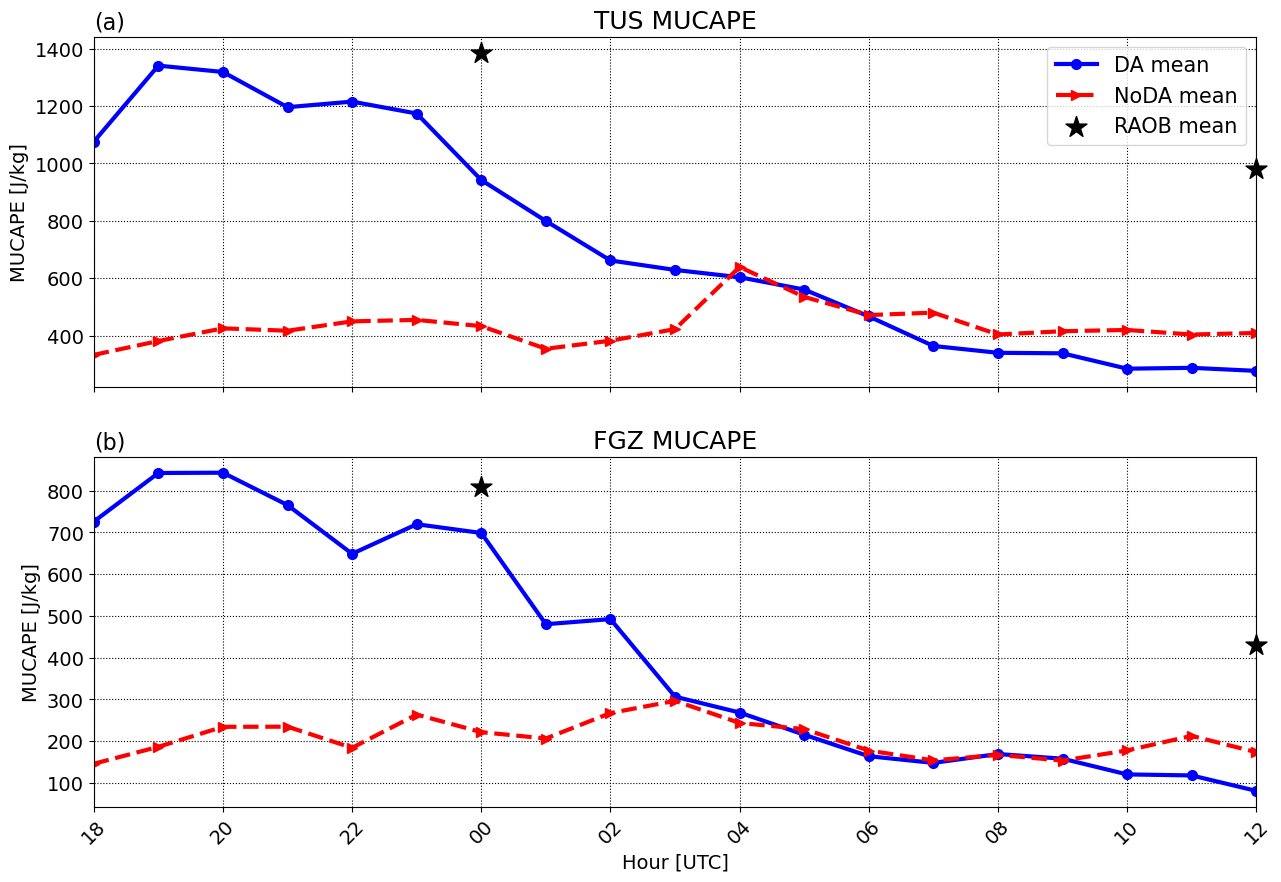

In [12]:
## PLOTS all
fig = plt.figure(1,figsize=(15, 10))
plt.subplot(211)
msz = 7
plt.plot(tt1,tus_DA,'b',marker='o',markersize=msz,linewidth=3)
plt.plot(tt1,tus_NO,'r',marker='>',markersize=msz,linestyle='dashed',linewidth=3)
plt.scatter(tt1[6],mu_tusMUCAPE00,marker='*',s=250,c='k')
plt.scatter(tt1[18],mu_tusMUCAPE12,marker='*',s=250,c='k',clip_on=False)
plt.tick_params('x', labelbottom=False)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([tt1[0], tt1[18]])
#plt.ylim([3,9])
plt.grid(color='black', linestyle='dotted')
plt.title('TUS MUCAPE',fontsize=18)
plt.title('(a)',fontsize=16,loc='left')
plt.ylabel('MUCAPE [J/kg]',fontsize=14)
plt.legend(['DA mean','NoDA mean','RAOB mean'],
            fontsize=15,loc=1)

ax = plt.subplot(212)
plt.plot(tt1,fgz_DA,'b',marker='o',markersize=msz,linewidth=3)
plt.plot(tt1,fgz_NO,'r',marker='>',markersize=msz,linestyle='dashed',linewidth=3)
plt.scatter(tt1[6],mu_fgzMUCAPE00,marker='*',s=250,c='k')
plt.scatter(tt1[18],mu_fgzMUCAPE12,marker='*',s=250,c='k',clip_on=False)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xlim([tt1[0], tt1[18]])
#plt.ylim([3,9])
plt.grid(color='black', linestyle='dotted')
plt.title('FGZ MUCAPE',fontsize=18)
plt.title('(b)',fontsize=16,loc='left')
plt.xlabel('Hour [UTC]',fontsize=14)
plt.ylabel('MUCAPE [J/kg]',fontsize=14)

## SAVE
dir_out = '/secchi/bayu/PLOTS/ARIZONA_PRO/MUCAPE/'
plotfile  = 'MEAN_MUCAPE_RAOB-DANoDA_detr_CASES.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

plt.show()
plt.close()